In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

### 31. Waffle Chart
The waffle chart can be created using the pywaffle package and is used to show the compositions of groups in a larger population.

In [4]:
! pip install pywaffle
# Reference: https://stackoverflow.com/questions/41400136/how-to-do-waffle-charts-in-python-square-piechart
from pywaffle import Waffle

# Import
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size().reset_index(name='counts')
n_categories = df.shape[0]
colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]

# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '111': {
            'values': df['counts'],
            'labels': ["{0} ({1})".format(n[0], n[1]) for n in df[['class', 'counts']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'height': 'upper_right'},
            'title': {'label': '# Vehicles by Class', 'loc': 'center', 'fontsize':18}
        },
    },
    rows=7,
    colors=colors,
    figsize=(16, 9)
)



C:\Users\qather\AppData\Local\Programs\Python\Python312\Lib\threading.py:1014: ResourceWarning: unclosed file <_io.BufferedWriter name=3>
  del self._target, self._args, self._kwargs
C:\Users\qather\AppData\Local\Programs\Python\Python312\Lib\threading.py:1014: ResourceWarning: unclosed file <_io.BufferedReader name=4>
  del self._target, self._args, self._kwargs
C:\Users\qather\AppData\Local\Programs\Python\Python312\Lib\threading.py:1014: ResourceWarning: unclosed file <_io.BufferedReader name=5>
  del self._target, self._args, self._kwargs


TypeError: Bbox.from_bounds() missing 1 required positional argument: 'height'

In [5]:


#! pip install pywaffle
from pywaffle import Waffle

# Import
# df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Prepare Data
# By Class Data
df_class = df_raw.groupby('class').size().reset_index(name='counts_class')
n_categories = df_class.shape[0]
colors_class = [plt.cm.Set3(i/float(n_categories)) for i in range(n_categories)]

# By Cylinders Data
df_cyl = df_raw.groupby('cyl').size().reset_index(name='counts_cyl')
n_categories = df_cyl.shape[0]
colors_cyl = [plt.cm.Spectral(i/float(n_categories)) for i in range(n_categories)]

# By Make Data
df_make = df_raw.groupby('manufacturer').size().reset_index(name='counts_make')
n_categories = df_make.shape[0]
colors_make = [plt.cm.tab20b(i/float(n_categories)) for i in range(n_categories)]


# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '311': {
            'values': df_class['counts_class'],
            'labels': ["{1}".format(n[0], n[1]) for n in df_class[['class', 'counts_class']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'Class'},
            'title': {'label': '# Vehicles by Class', 'loc': 'center', 'fontsize':18},
            'colors': colors_class
        },
        '312': {
            'values': df_cyl['counts_cyl'],
            'labels': ["{1}".format(n[0], n[1]) for n in df_cyl[['cyl', 'counts_cyl']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'Cyl'},
            'title': {'label': '# Vehicles by Cyl', 'loc': 'center', 'fontsize':18},
            'colors': colors_cyl
        },
        '313': {
            'values': df_make['counts_make'],
            'labels': ["{1}".format(n[0], n[1]) for n in df_make[['manufacturer', 'counts_make']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'Manufacturer'},
            'title': {'label': '# Vehicles by Make', 'loc': 'center', 'fontsize':18},
            'colors': colors_make
        }
    },
    rows=9,
    figsize=(16, 14)
)



TypeError: Bbox.from_bounds() missing 1 required positional argument: 'height'

### 32. Pie Chart
Pie chart is a classic way to show the composition of groups. However, its not generally advisable to use nowadays because the area of the pie portions can sometimes become misleading. So, if you are to use pie chart, its highly recommended to explicitly write down the percentage or numbers for each portion of the pie.

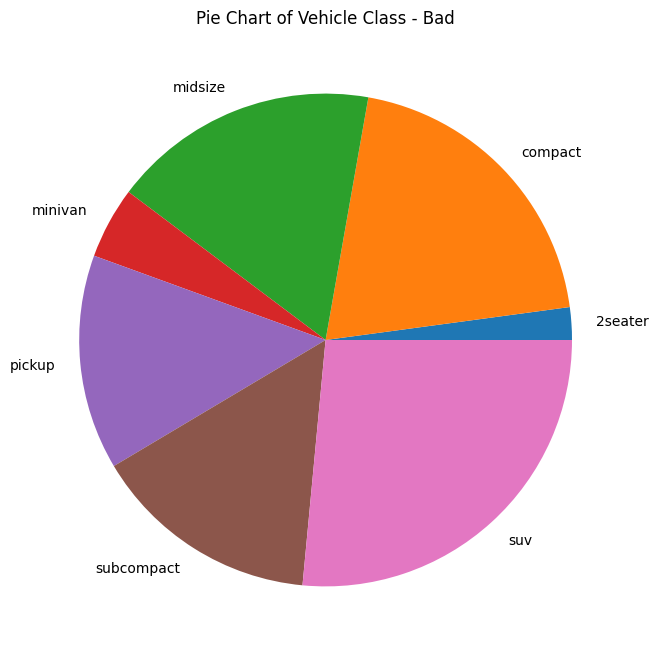

In [7]:
# Import
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size()

# Make the plot with pandas
df.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title("Pie Chart of Vehicle Class - Bad")
plt.ylabel("")
plt.show()

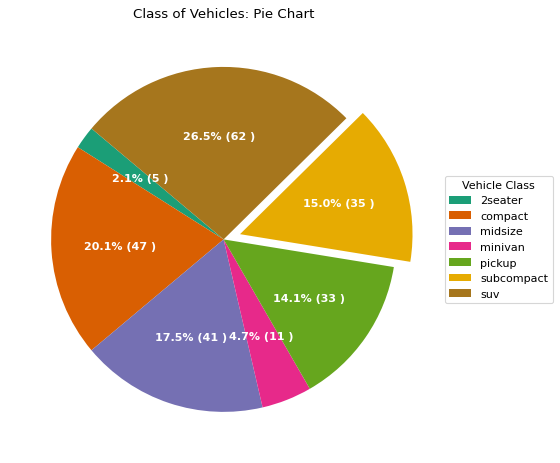

In [8]:


# Import
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size().reset_index(name='counts')

# Draw Plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = df['counts']
categories = df['class']
explode = [0,0,0,0,0,0.1,0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

# Decoration
ax.legend(wedges, categories, title="Vehicle Class", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Class of Vehicles: Pie Chart")
plt.show()



### 33. Treemap
Tree map is similar to a pie chart and it does a better work without misleading the contributions by each group.

C:\Users\qather\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedWriter name=5>
  return process_handler(cmd, _system_body)
C:\Users\qather\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)
C:\Users\qather\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  return process_handler(cmd, _system_body)


  Obtaining dependency information for squarify from https://files.pythonhosted.org/packages/b7/3c/eedbe9fb07cc20fd9a8423da14b03bc270d0570b3ba9174a4497156a2152/squarify-0.4.4-py3-none-any.whl.metadata


C:\Users\qather\AppData\Local\Temp\ipykernel_3928\4005150419.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)


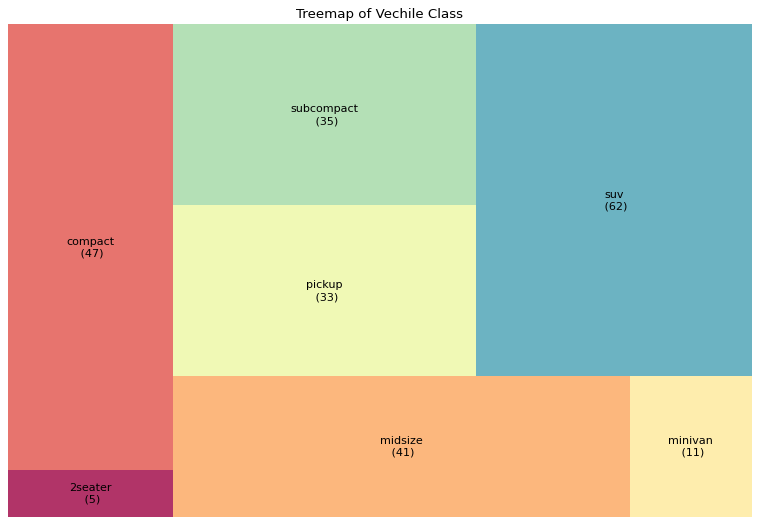

In [11]:
!pip install squarify
import squarify 

# Import Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size().reset_index(name='counts')
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Vechile Class')
plt.axis('off')
plt.show()

### 34. Bar Chart
Bar chart is a classic way of visualizing items based on counts or any given metric. In below chart, I have used a different color for each item, but you might typically want to pick one color for all items unless you to color them by groups. The color names get stored inside all_colors in the code below. You can change the color of the bars by setting the color parameter in plt.plot().

C:\Users\qather\AppData\Local\Temp\ipykernel_3928\637046056.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(df['manufacturer'], rotation=60, horizontalalignment= 'right')


(0.0, 45.0)

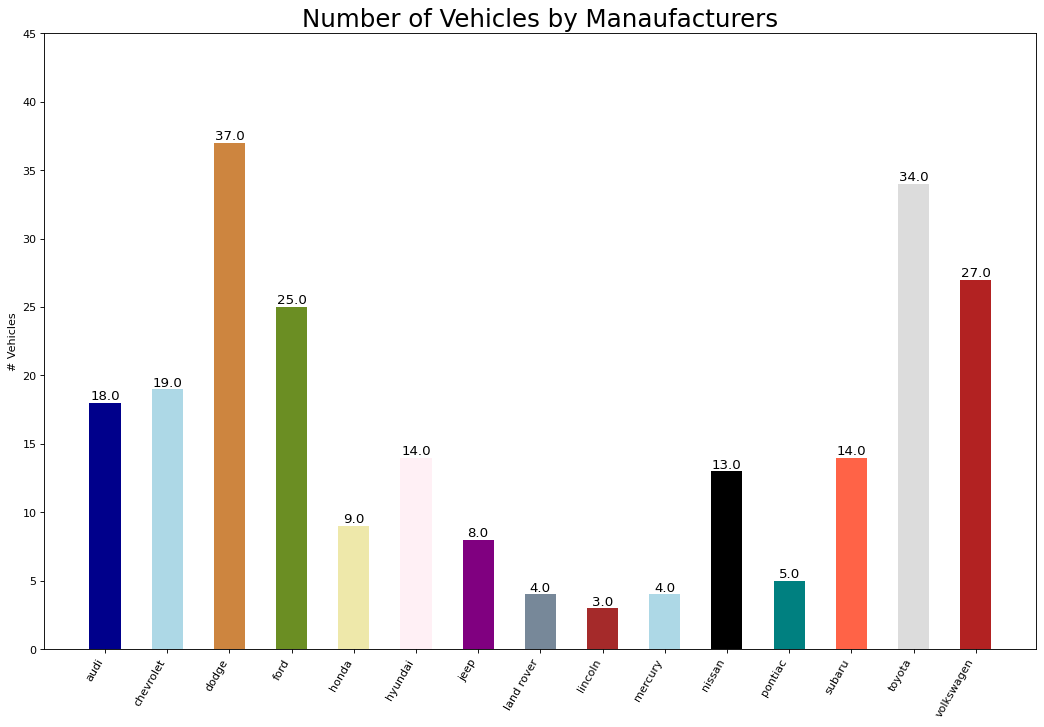

In [13]:
import random

# Import Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('manufacturer').size().reset_index(name='counts')
n = df['manufacturer'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

# Plot Bars
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df['manufacturer'], df['counts'], color=c, width=.5)
for i, val in enumerate(df['counts'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Decoration
plt.gca().set_xticklabels(df['manufacturer'], rotation=60, horizontalalignment= 'right')
plt.title("Number of Vehicles by Manaufacturers", fontsize=22)
plt.ylabel('# Vehicles')
plt.ylim(0, 45)